In [1]:
import pandas as p
import numpy as n
import sklearn as s
import matplotlib.pyplot as plt
from sklearn import preprocessing
from sklearn.tree import DecisionTreeClassifier
df=p.read_csv("D:\dataset\drug200.csv")
df.head(10)

,Age,Sex,BP,Cholesterol,Na_to_K,Drug
0,23,F,HIGH,HIGH,25.355,drugY
1,47,M,LOW,HIGH,13.093,drugC
2,47,M,LOW,HIGH,10.114,drugC
3,28,F,NORMAL,HIGH,7.798,drugX
4,61,F,LOW,HIGH,18.043,drugY
5,22,F,NORMAL,HIGH,8.607,drugX
6,49,F,NORMAL,HIGH,16.275,drugY
7,41,M,LOW,HIGH,11.037,drugC
8,60,M,NORMAL,HIGH,15.171,drugY
9,43,M,LOW,NORMAL,19.368,drugY


# Cleaning Dataset

In [2]:
df.shape

(200, 6)

In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 200 entries, 0 to 199
Data columns (total 6 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   Age          200 non-null    int64  
 1   Sex          200 non-null    object 
 2   BP           200 non-null    object 
 3   Cholesterol  200 non-null    object 
 4   Na_to_K      200 non-null    float64
 5   Drug         200 non-null    object 
dtypes: float64(1), int64(1), object(4)
memory usage: 9.5+ KB


In [4]:
df.isnull().sum()

Age            0
Sex            0
BP             0
Cholesterol    0
Na_to_K        0
Drug           0
dtype: int64

In [5]:
df['Drug'].value_counts()

drugY    91
drugX    54
drugA    23
drugC    16
drugB    16
Name: Drug, dtype: int64

Text(0.5, 0, 'Drugs')

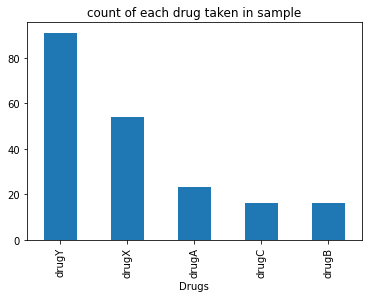

In [6]:
ax=df['Drug'].value_counts().plot(kind='bar',title="count of each drug taken in sample")
ax.set_xlabel("Drugs")

In [7]:
#Feature set
df.columns

Index(['Age', 'Sex', 'BP', 'Cholesterol', 'Na_to_K', 'Drug'], dtype='object')

In [8]:
#To use scikit-learn library, we  convert the Pandas data frame to a Numpy array
#X as the Feature Matrix
#y as the response vector (Drug)

X = df[['Age', 'Sex', 'BP', 'Cholesterol', 'Na_to_K']].values
X[0:5]

array([[23, 'F', 'HIGH', 'HIGH', 25.355],
       [47, 'M', 'LOW', 'HIGH', 13.093],
       [47, 'M', 'LOW', 'HIGH', 10.114],
       [28, 'F', 'NORMAL', 'HIGH', 7.798],
       [61, 'F', 'LOW', 'HIGH', 18.043]], dtype=object)

In [9]:
Y= df['Drug'].values
Y[0:5]

array(['drugY', 'drugC', 'drugC', 'drugX', 'drugY'], dtype=object)

In [10]:
#Normalization
#As you may figure out, some features in this dataset are categorical, such as Sex or BP. Unfortunately, Sklearn Decision Trees does not handle categorical variables. 
#We can still convert these features to numerical values using LabelEncoder to convert the categorical variable into numerical variables.

In [11]:
df['Sex'].value_counts()

M    104
F     96
Name: Sex, dtype: int64

In [12]:
df['BP'].value_counts()

HIGH      77
LOW       64
NORMAL    59
Name: BP, dtype: int64

In [13]:
df['Cholesterol'].value_counts()

HIGH      103
NORMAL     97
Name: Cholesterol, dtype: int64

In [14]:
df.head()

,Age,Sex,BP,Cholesterol,Na_to_K,Drug
0,23,F,HIGH,HIGH,25.355,drugY
1,47,M,LOW,HIGH,13.093,drugC
2,47,M,LOW,HIGH,10.114,drugC
3,28,F,NORMAL,HIGH,7.798,drugX
4,61,F,LOW,HIGH,18.043,drugY


In [15]:
from sklearn.preprocessing import LabelEncoder
le_sex = preprocessing.LabelEncoder()
le_sex.fit(['F','M'])
X[:,1] = le_sex.transform(X[:,1]) 


le_BP = preprocessing.LabelEncoder()
le_BP.fit([ 'LOW', 'NORMAL', 'HIGH'])
X[:,2] = le_BP.transform(X[:,2])


le_Chol = preprocessing.LabelEncoder()
le_Chol.fit([ 'NORMAL', 'HIGH'])
X[:,3] = le_Chol.transform(X[:,3]) 

X[0:5]

array([[23, 0, 0, 0, 25.355],
       [47, 1, 1, 0, 13.093],
       [47, 1, 1, 0, 10.114],
       [28, 0, 2, 0, 7.798],
       [61, 0, 1, 0, 18.043]], dtype=object)

# Setting up the Decision Tree

In [16]:

#We will be using train/test split on our decision tree. Let's import train_test_split from sklearn.cross_validation.
from sklearn.model_selection import train_test_split
X_trainset, X_testset, Y_trainset, Y_testset = train_test_split(X, Y, test_size=0.3, random_state=3)

# Modeling

In [17]:

#We will first create an instance of the DecisionTreeClassifier called drugTree. 
#Inside of the classifier, specify criterion="entropy" so we can see the information gain of each node.
drugTree = DecisionTreeClassifier(criterion="entropy", max_depth = 4)
drugTree.fit(X_trainset,Y_trainset)


DecisionTreeClassifier(criterion='entropy', max_depth=4)

# Prediction

In [18]:

predTree = drugTree.predict(X_testset)
print (predTree [0:5])
print (Y_testset [0:5])

['drugY' 'drugX' 'drugX' 'drugX' 'drugX']
['drugY' 'drugX' 'drugX' 'drugX' 'drugX']


# Accuracy

In [19]:

from sklearn import metrics
from sklearn.metrics import confusion_matrix
print("DecisionTrees's Accuracy: ", metrics.accuracy_score(Y_testset, predTree))
confusion_matrix(Y_testset,predTree)
#cm_display=metrics.confusionMatrixDisplay(confusion_matrix)=confusion_matrix,display_labels=[False,True]
#print(confusion_matrix)

DecisionTrees's Accuracy:  0.9833333333333333


array([[ 7,  0,  0,  0,  0],
       [ 0,  5,  0,  0,  0],
       [ 0,  0,  5,  0,  0],
       [ 0,  0,  0, 20,  1],
       [ 0,  0,  0,  0, 22]], dtype=int64)

# Visualization

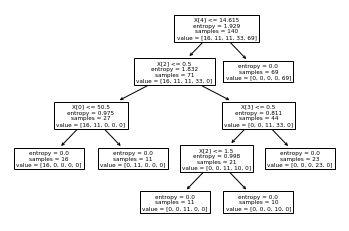

In [20]:
# Visualization
import sklearn.tree as tree

tree.plot_tree(drugTree)
plt.show()